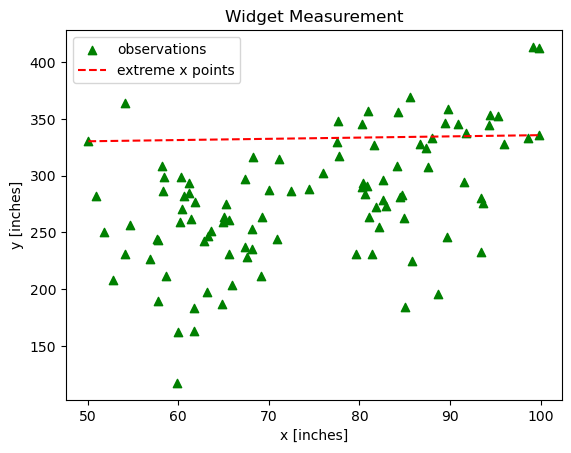

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv('C:/Users/anike/OneDrive/Desktop/Aniket/Course/IE 555/Assignment-4/scatter_data.csv', comment="%", names=["x", "y"])

# Extract columns
x = data["x"]
y = data["y"]

# Plot the data points as green triangles
plt.scatter(x, y, marker='^', color='green', label="observations")

# Add labels and title
plt.xlabel('x [inches]')
plt.ylabel('y [inches]')
plt.title("Widget Measurement")

# Calculate the left-most and right-most points
x_min = min(x)
x_max = max(x)

y_min = y[x.idxmin()]
y_max = y[x.idxmax()]

# Draw a horizontal dashed red line
plt.plot([x_min, x_max], [y_min, y_max], 'r--', label='extreme x points')

# Display the plot with the legend
plt.legend()
plt.show()

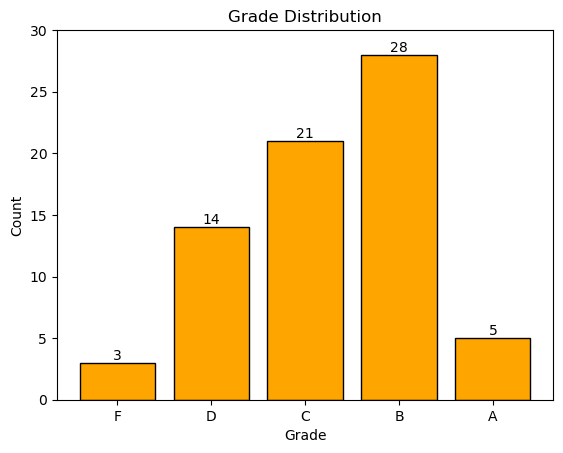

In [7]:
import pandas as pd
import math
import matplotlib.pyplot as plt

# Read the CSV file
file_path = 'C:/Users/anike/OneDrive/Desktop/Aniket/Course/IE 555/Assignment-4/student_grades.csv'
data = pd.read_csv(file_path, comment="%", names=["studentID", "avgScore"])

# Define the grade bins
score_bins = {
    'A': (90, 100),
    'B': (80, 90),
    'C': (70, 80),
    'D': (60, 70),
    'F': (0, 60)
}

# Create a function to assign grades based on the average score
def assign_grade(score):
    for grade, (lower, upper) in score_bins.items():
        if lower <= (score) < upper:
            return grade

# Apply the function to create a new column 'Grade'
data['Grade'] = data['avgScore'].apply(assign_grade)

# Count the number of students in each grade
grade_counts = data['Grade'].value_counts().sort_index()

# Define the grades in reverse order
grades = list(grade_counts.index)[::-1]
counts = list(grade_counts.values)[::-1]

# Create the histogram with reversed grades
plt.bar(grades, counts, color='orange', edgecolor='black')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.ylim(0, 30)
plt.title('Grade Distribution')
for i, v in enumerate(counts):
    plt.text(grades[i], v, str(v), ha='center', va='bottom')
plt.show()

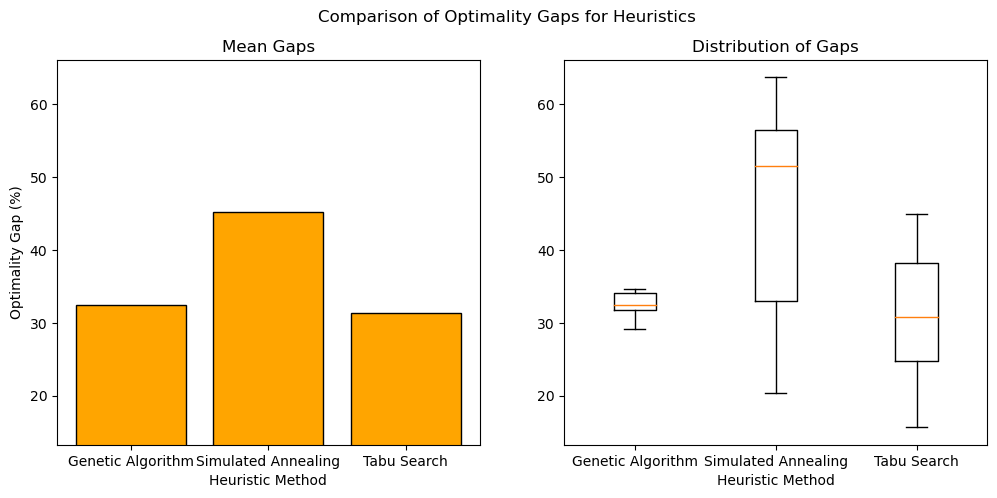

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics

# Read the CSV file
file_path = 'C:/Users/anike/OneDrive/Desktop/Aniket/Course/IE 555/Assignment-4/solution_data.csv'
data = pd.read_csv(file_path, comment="%", names=["Problem", "SolnMethod", "Value"])

avg_gen = []
avg_ann = []
avg_tabu = []
for i in range(0,10):
    optimal_val = data[(data['Problem']==i) & (data['SolnMethod'] == 'optimal')].values[0][2]
    temp_gen_alg = data[(data['Problem']==i) & (data['SolnMethod'] == 'genetic algorithm')].values[0][2]
    temp_ann_alg = data[(data['Problem']==i) & (data['SolnMethod'] == 'simulated annealing')].values[0][2]
    temp_tabu_alg = data[(data['Problem']==i) & (data['SolnMethod'] == 'tabu search')].values[0][2]
# print(optimal_val, type(optimal_val))
    avg_gen.append(((optimal_val-temp_gen_alg)/optimal_val)*100)
    avg_ann.append(((optimal_val-temp_ann_alg)/optimal_val)*100)
    avg_tabu.append(((optimal_val-temp_tabu_alg)/optimal_val)*100)

d = [avg_gen,avg_ann, avg_tabu]
d_avg = [statistics.mean(avg_gen),statistics.mean(avg_ann),statistics.mean(avg_tabu)]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.bar(range(3), d_avg , color='orange', edgecolor='black',tick_label = ['Genetic Algorithm','Simulated Annealing','Tabu Search'])
ax1.set_xlabel('Heuristic Method')
ax1.set_ylabel('Optimality Gap (%)')
ax1.set_title('Mean Gaps')

ax2.boxplot(d)
ax2.set_xticklabels(['Genetic Algorithm', 'Simulated Annealing', 'Tabu Search'])
ax2.set_xlabel('Heuristic Method')
ax2.set_title('Distribution of Gaps')

ax1.set_ylim(ax2.get_ylim())

fig.suptitle('Comparison of Optimality Gaps for Heuristics')
plt.show()


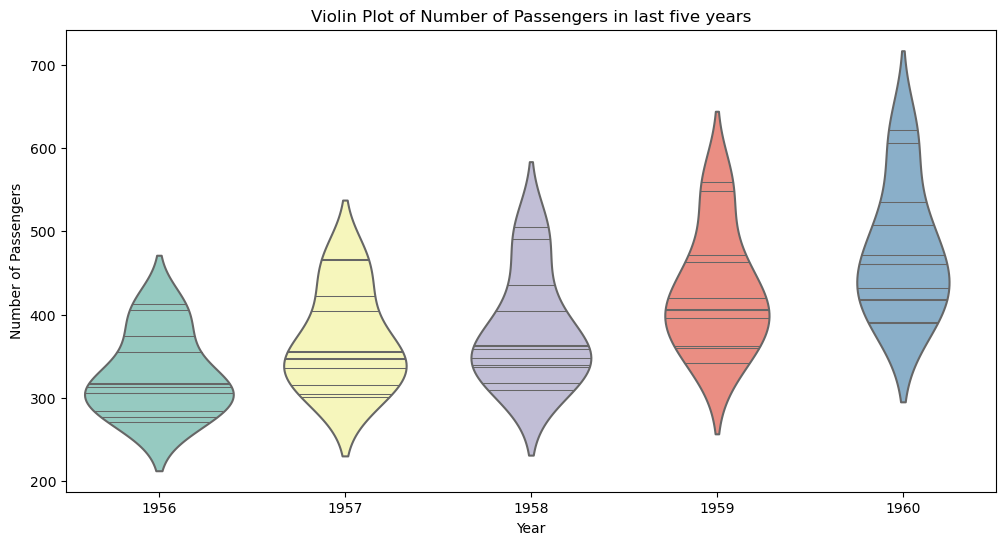

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
file_path = 'C:/Users/anike/OneDrive/Desktop/Aniket/Course/IE 555/Assignment-4/flights.csv'
data = pd.read_csv(file_path)

# Filter the data for the last five years 
selected_years = [1960, 1959, 1958, 1957, 1956]
filtered_data = data[data['year'].isin(selected_years)]

# Create a DataFrame
df = pd.DataFrame(filtered_data)

# Pivot the data to prepare for the violin plot
pivot_df = df.pivot(index='month', columns='year', values='passengers')

# Create a violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=pivot_df, inner="stick", palette="Set3")
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.title('Violin Plot of Number of Passengers in last five years')

# Show the plot
plt.show()

#The violine Graph shows the distribution of the data in the given five years.
#It depicts that travelling rate keep increasing with the years and violine length also keep increasing.
#In 1956 data points are distributed between 200 to 480 but thedistribution lenght increased in 1960.